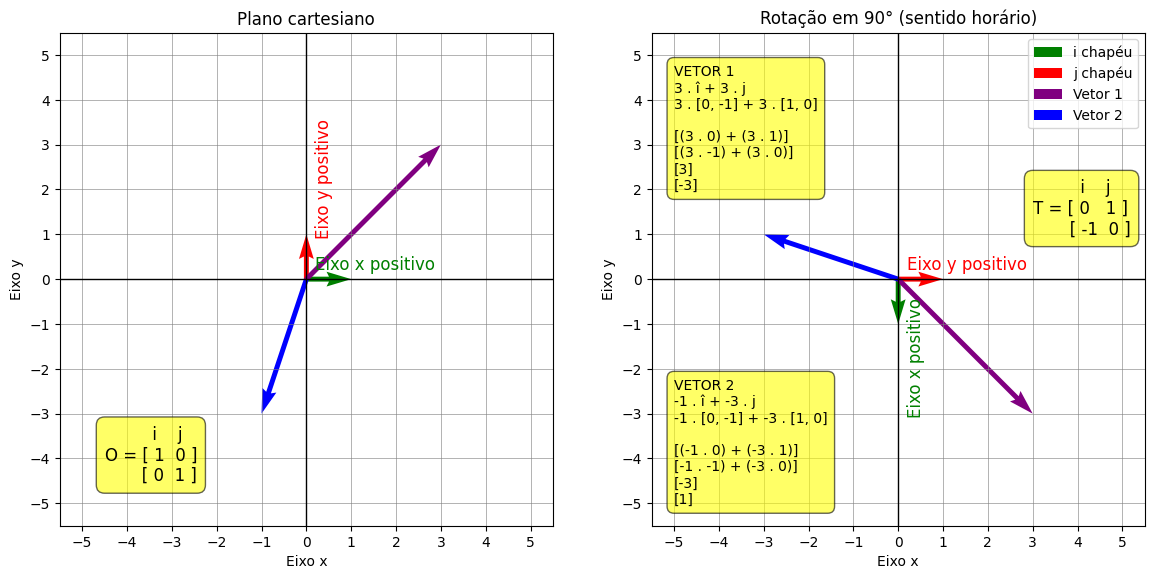

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# definindo os extremos e a origem
eixos = np.array([-6, 12])
origem = np.array([0, 0])
matriz_transform = np.array([[0, 1], 
                                [-1, 0]])

fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
ax1 = axes[0]
ax2 = axes[1]

# função para criar um plano cartesiano
def config_ax(ax):
  # Define as marcas principais para as unidades (retângulos)
  unidades = np.arange(-5, 6, 1)
  ax.set_xticks(unidades)
  ax.set_yticks(unidades)

  # Desenha a grade para representar os retângulos
  ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.6)

  # Garante que as unidades sejam visualmente quadradas (Crucial!)
  ax.set_aspect('equal', adjustable='box') 

  # Define os limites para o plano
  ax.set_xlim(unidades.min() - 0.5, unidades.max() + 0.5)
  ax.set_ylim(unidades.min() - 0.5, unidades.max() + 0.5)

  # Criando linhas cortando a origem entre os extremos
  ax.plot(eixos, origem, color='black', linestyle='-', linewidth=1)
  ax.plot(origem, eixos, color='black', linestyle='-', linewidth=1)
  ax.set_xlabel('Eixo x')
  ax.set_ylabel('Eixo y')

config_ax(ax1)
config_ax(ax2)

ax1.set_title('Plano cartesiano')
ax1.text(0.2, 0.2, 'Eixo x positivo', fontsize=12, color='green')
ax1.text(0.2, 1, 'Eixo y positivo', fontsize=12, color='red', rotation=90)
# vetores bases no ax original (i, j)
ax1.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='green', width=0.01, label='i chapéu')
ax1.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='j chapéu')
ax1.text(-4.5, -4.5, 
                     '         i    j\nO = [ 1  0 ]\n       [ 0  1 ]', 
                     fontsize=12, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
# vetores
vet1 = np.array([3, 3])
vet2 = np.array([-1, -3])
ax1.quiver(0, 0, vet1[0], vet1[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.01, label='Vetor 1')
ax1.quiver(0, 0, vet2[0], vet2[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='Vetor 2')

# Rotação de 90° demonstração
ax2.set_title('Rotação em 90° (sentido horário)')
ax2.text(0.2, -3.0, 'Eixo x positivo', fontsize=12, color='green', rotation=90)
ax2.text(0.2, 0.2, 'Eixo y positivo', fontsize=12, color='red')
# vetores bases no ax transformado (i, j)
ax2.quiver(0, 0, 0, -1, angles='xy', scale_units='xy', scale=1, color='green', width=0.01, label='i chapéu')
ax2.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='j chapéu')
ax2.text(3.0, 1.0, 
                     '         i    j\nT = [ 0   1 ]\n       [ -1  0 ]', 
                     fontsize=12, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
vet1_t = matriz_transform @ vet1
vet2_t = matriz_transform @ vet2
ax2.quiver(0, 0, vet1_t[0], vet1_t[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.01, label='Vetor 1')
ax2.quiver(0, 0, vet2_t[0], vet2_t[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='Vetor 2')

# Cálculo dos resultados numericamente
ax2.text(-5.0, 2.0, 
                     'VETOR 1\n3 . î + 3 . j\n3 . [0, -1] + 3 . [1, 0]\n\n[(3 . 0) + (3 . 1)]\n[(3 . -1) + (3 . 0)]\n[3]\n[-3]', 
                     fontsize=10, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
ax2.text(-5.0, -5.0, 
                     'VETOR 2\n-1 . î + -3 . j\n-1 . [0, -1] + -3 . [1, 0]\n\n[(-1 . 0) + (-3 . 1)]\n[-1 . -1) + (-3 . 0)]\n[-3]\n[1]', 
                     fontsize=10, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))

plt.legend()
plt.show()


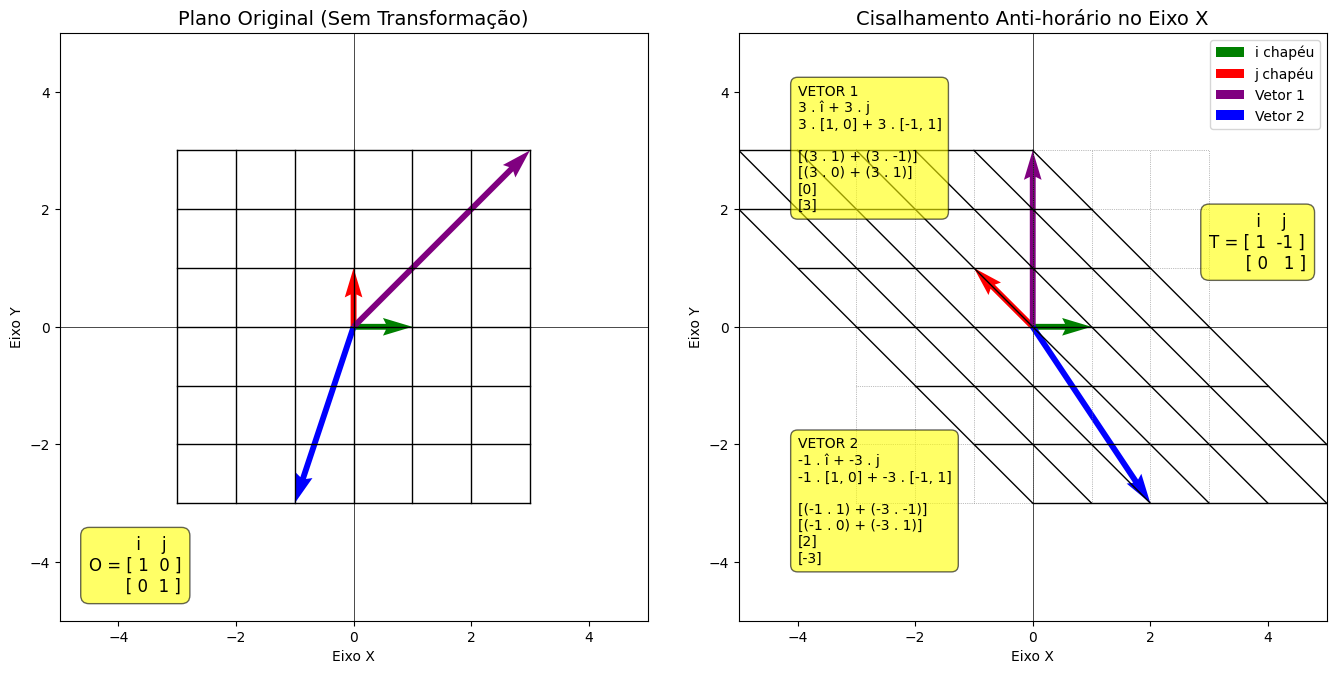

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Cisalhamento no eixo antihorário
fator_cisalhamento = -1.0 
matriz_cisalhamento = np.array([[1, fator_cisalhamento], 
                                [0, 1]])

# Criação da Grade de Pontos
limites = np.linspace(-3, 3, 7) 
num_pontos = 50 
eixos_base = np.linspace(limites.min(), limites.max(), num_pontos)

#  Configuração da Figura com Dois Eixos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7)) 
ax_original = axes[0]    
ax_transformado = axes[1] 

# Configurações comuns de Eixos
for ax in axes:
    ax.set_aspect('equal', adjustable='box') 
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(False)

for val in limites:
    ax_original.plot([val, val], [limites.min(), limites.max()], 
                     color='black', linestyle='-', linewidth=1)
    ax_original.plot([limites.min(), limites.max()], [val, val], 
                     color='black', linestyle='-', linewidth=1)
ax_original.set_title('Plano Original (Sem Transformação)', fontsize=14)

# vetores bases no ax original (i, j)
ax_original.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='green', width=0.01, label='i chapéu')
ax_original.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='j chapéu')
ax_original.text(-4.5, -4.5, 
                     '         i    j\nO = [ 1  0 ]\n       [ 0  1 ]', 
                     fontsize=12, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
# vetores
vet1 = np.array([3, 3])
vet2 = np.array([-1, -3])
ax_original.quiver(0, 0, vet1[0], vet1[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.01, label='Vetor 1')
ax_original.quiver(0, 0, vet2[0], vet2[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='Vetor 2')

# Grade Original (Referência Cinza)
for val in limites:
    ax_transformado.plot([val, val], [limites.min(), limites.max()], 
                         color='gray', linestyle=':', linewidth=0.5)
    ax_transformado.plot([limites.min(), limites.max()], [val, val], 
                         color='gray', linestyle=':', linewidth=0.5)

# Aplicação da Transformação à Grade (Linhas Vermelhas Transformadas)
for x in limites:
    linha_original = np.array([np.full(num_pontos, x), eixos_base])
    linha_transformada = matriz_cisalhamento @ linha_original
    ax_transformado.plot(linha_transformada[0, :], linha_transformada[1, :], 
            color='black', linestyle='-', linewidth=1)

for y in limites:
    linha_original = np.array([eixos_base, np.full(num_pontos, y)])
    linha_transformada = matriz_cisalhamento @ linha_original
    ax_transformado.plot(linha_transformada[0, :], linha_transformada[1, :], 
            color='black', linestyle='-', linewidth=1)

# vetores bases após a transformação
i = matriz_cisalhamento @ np.array([1, 0]) # multiplicação de vetor por matriz
j = matriz_cisalhamento @ np.array([0, 1])
ax_transformado.quiver(0, 0, i[0], i[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.01, label='i chapéu')
ax_transformado.quiver(0, 0, j[0], j[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='j chapéu')
# Aplicando as transformações nos vetores 1 e 2
vet1_t = matriz_cisalhamento @ vet1
vet2_t = matriz_cisalhamento @ vet2
ax_transformado.quiver(0, 0, vet1_t[0], vet1_t[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.01, label='Vetor 1')
ax_transformado.quiver(0, 0, vet2_t[0], vet2_t[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='Vetor 2')
ax_transformado.set_title(f'Cisalhamento Anti-horário no Eixo X', fontsize=14)

ax_transformado.text(3.0, 1.0, 
                     '         i    j\nT = [ 1  -1 ]\n       [ 0   1 ]', 
                     fontsize=12, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
# Cálculo dos resultados numericamente
ax_transformado.text(-4.0, 2.0, 
                     'VETOR 1\n3 . î + 3 . j\n3 . [1, 0] + 3 . [-1, 1]\n\n[(3 . 1) + (3 . -1)]\n[(3 . 0) + (3 . 1)]\n[0]\n[3]', 
                     fontsize=10, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
ax_transformado.text(-4.0, -4.0, 
                     'VETOR 2\n-1 . î + -3 . j\n-1 . [1, 0] + -3 . [-1, 1]\n\n[(-1 . 1) + (-3 . -1)]\n[(-1 . 0) + (-3 . 1)]\n[2]\n[-3]', 
                     fontsize=10, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))

# Exibição 
plt.tight_layout(pad=3.0)
plt.legend() 
plt.show()